In [2]:
#!pip install vaderSentiment 

In [3]:
# Dependencies
import tweepy
import os
import numpy as np
import pandas as pd
import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/pariya/Desktop/pariya_GW_HW_Python_APIs/Twitter-API-Instructions


In [5]:
# get back up 2 level to be on Desktop first, then navigate to 'gwu-' directory which contains config.py inside
os.chdir(os.path.join('..','..','gwu-arl-data-pt-03-2020-u-c'))

# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/pariya/Desktop/gwu-arl-data-pt-03-2020-u-c'

In [6]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True) # This'll make the rest of the code obey the rate limit. StackOverFlow

In [7]:
# Target Search Term ----- BBC, CBS, CNN, Fox, and New York times
target_terms = ("@BBC", "@CBS", "@CNN", "@Fox", "@New York times")

# Appended Lists
tweets_list = []
search_term_list = []

# Loop thru all target users
for target in target_terms:
    
    # Iterate thru the ---most recent 100 tweets on target users---
     for tweet in tweepy.Cursor(api.search, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

        #tweets_list[0]

        user_list = []
        text_list = []
        createdOn_list = []

        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []

        # Loop through all tweets
        for tweet in tweets_list:
                    
            # Run VADER Analysis on each tweet
            tweet_user = tweet.user.screen_name
            tweet_text = tweet.full_text
            tweet_created = tweet.created_at      
        
            # Run sentiments analysis using --tweet.full_text--
            results = analyzer.polarity_scores(tweet_text)
            com = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]

            # Store each value to the appropriate list created above
            user_list.append(tweet_user)
            text_list.append(tweet_text)
            createdOn_list.append(tweet_created)
        
            compound_list.append(com)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [8]:
result_df = pd.DataFrame({
    'User': user_list,
    'Search Term': search_term_list,
    'Tweet Text': text_list,
    'Created on': createdOn_list,
    'Compound': compound_list,
    'Positive': positive_list,
    'Negative': negative_list,
    'Neutral': neutral_list,
})

pd.set_option('display.max_colwidth', -1)

/Users/pariya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [9]:
#result_sorted = result_df.sort_values(by=['Created on'])

In [10]:
result_df['Timestamps'] = result_df['Created on'].values.astype(np.int) // 10 ** 9
result_df

,User,Search Term,Tweet Text,Created on,Compound,Positive,Negative,Neutral,Timestamps
0,OjukwuStanley12,@BBC,"RT @IpobosisiomaLga: Stop dreaming!, #IPOB will never relent,all of you Yoruba media on Twitter and Facebook bearing Igbo Names,\nhow do you…",2020-05-22 09:14:42,-0.3595,0.000,0.106,0.894,1590138882
1,MartineGee1,@BBC,"@HollyAnnPerks1 @StarbucksUK @BBC So, in short, you don’t have the information and can’t answer the question. Embarrassing!",2020-05-22 09:14:21,-0.4389,0.000,0.153,0.847,1590138861
2,ed19mitch,@BBC,@YardleyShooting @BBC Forensic questions but no forensic answers.,2020-05-22 09:14:19,-0.4215,0.000,0.286,0.714,1590138859
3,eyehandman,@BBC,RT @GlassAnimals: the bbc asked me to play some instruments on my stoop. so naturally i put on my overalls\nfor the occasion. thank u @BBC.…,2020-05-22 09:13:57,0.5994,0.170,0.000,0.830,1590138837
4,jameseonline,@BBC,RT @BBC: ‘I’d describe it like the reactions inside the sun.’\n\nThis is what it's like to live with severe anxiety.\n\n#MentalHealth @BBC_Teac…,2020-05-22 09:13:54,0.1779,0.177,0.152,0.671,1590138834
...,...,...,...,...,...,...,...,...,...
397,Socratic1,@Fox,@JoshuaPotash @TuckerCarlson is endangering people’s lives by spreading lies. @FOX should be put on notice that he’s using his public persona making proven inaccurate statements that could kill people. There is irrefutable data from 50 states. #BoycottFOX,2020-05-22 01:25:38,-0.8176,0.000,0.176,0.824,1590110738
398,trisweb,@Fox,@buzzusborne @fox Yep. That's kind of a problem right now then...,2020-05-22 01:24:53,-0.1280,0.158,0.194,0.647,1590110693
399,grahamyoung,@Fox,@buzzusborne @fox How do I get in the being mentored by Buzz club?,2020-05-22 01:23:57,0.0000,0.000,0.000,1.000,1590110637
400,jpschultze,@New York times,"Neither here nor in article today in @New York Times is mention of unproductive time. Prior to pandemic, encouraged to arrive at airport 1-2 hours prior to flight; post pandemic could be 3-4 hours?! Puts roadway infrastructure issues in perspective!! https://t.co/2D0oIEpy0V",2020-05-19 19:51:02,0.5229,0.078,0.000,0.922,1589917862


In [29]:
result_df.to_csv('../sentiment_analysis.csv', index=False)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#ts_max = result_df['Timestamps'].max()
#ts_min = result_df['Timestamps'].min()
#print(ts_max, ts_min)

In [14]:
# Filter each News channel to work on ---@BBC, @CBS, @CNN, @Fox, @New York times---
bbc = result_df.loc[result_df['Search Term']=='@BBC', :]
cbs = result_df.loc[result_df['Search Term']=='@CBS', :]
cnn = result_df.loc[result_df['Search Term']=='@CNN', :]
fox = result_df.loc[result_df['Search Term']=='@Fox', :]
nyt = result_df.loc[result_df['Search Term']=='@New York times', :]

In [17]:
# convert DATE&TIME to Timestamps
#bbc['bbc_ts'] = bbc['Created on'].values.astype(np.int) // 10 ** 9
#cbs['cbs_ts'] = cbs['Created on'].values.astype(np.int) // 10 ** 9
#cnn['cnn_ts'] = cnn['Created on'].values.astype(np.int) // 10 ** 9
#fox['fox_ts'] = fox['Created on'].values.astype(np.int) // 10 ** 9
#nyt['nyt_ts'] = nyt['Created on'].values.astype(np.int) // 10 ** 9

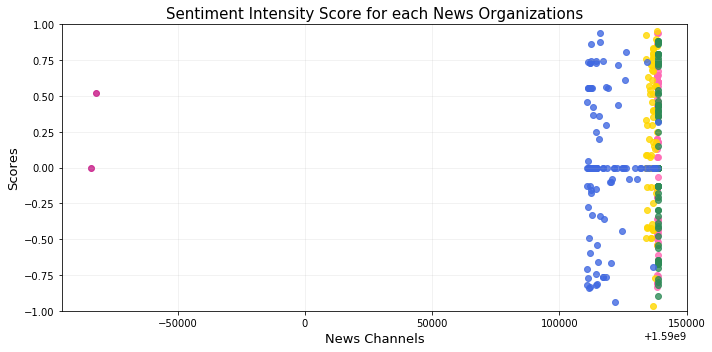

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(bbc['Timestamps'], bbc['Compound'], color="hotpink", alpha=0.8)
ax.scatter(cbs['Timestamps'], cbs['Compound'], color="gold", alpha=0.8)
ax.scatter(cnn['Timestamps'], cnn['Compound'], color="seagreen", alpha=0.8)
ax.scatter(fox['Timestamps'], fox['Compound'], color="royalblue", alpha=0.8)
ax.scatter(nyt['Timestamps'], nyt['Compound'], color="mediumvioletred", alpha=0.8)

ax.set_ylim(-1, 1)
#ax.set_xlim(100, 0)
ax.set_xlabel('News Channels', fontsize=13)
ax.set_ylabel('Scores', fontsize=13)
ax.set_title('Sentiment Intensity Score for each News Organizations', fontsize=15)

ax.grid(alpha=.2)
fig.tight_layout()

plt.show()

(-0.1, 0.3)

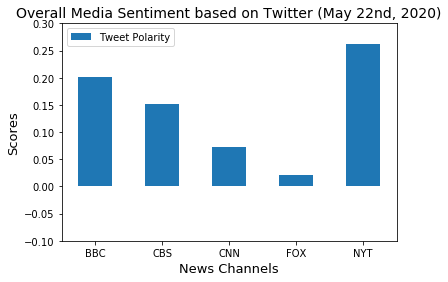

In [30]:
bbc_av = bbc['Compound'].mean()
cbs_av = cbs['Compound'].mean()
cnn_av = cnn['Compound'].mean()
fox_av = fox['Compound'].mean()
nyt_av = nyt['Compound'].mean()

index = ["@BBC", "@CBS", "@CNN", "@Fox", "@New York times"]

df = pd.DataFrame({'Channels': ['BBC', 'CBS', 'CNN', 'FOX', 'NYT'], 
                   'Tweet Polarity': [bbc_av, cbs_av, cnn_av, fox_av, nyt_av]})

ax = df.plot.bar(x='Channels', y='Tweet Polarity', rot=0)

ax.set_xlabel('News Channels', fontsize=13)
ax.set_ylabel('Scores', fontsize=13)
ax.set_title('Overall Media Sentiment based on Twitter (May 22nd, 2020)', fontsize=14)
fig.tight_layout()

ax.set_ylim(-0.1, 0.3)